In [243]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [89]:
 pd.read_excel('https://cdn.upgrad.com/UpGrad/temp/a625d1ee-b8d7-4edb-bdde-b1d82beaf5b4/Data+Dictionary-+Telecom+Churn+Case+Study.xlsx')

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belo...
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mo..."
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


In [90]:
telecom_data = pd.read_csv('https://upgraddocs.s3.us-east-2.amazonaws.com/telecom_churn_data.csv')
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


### Data cleaning: 

In [91]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [92]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(telecom_data.describe())

       mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.5

In [93]:
telecom_data.shape

(99999, 226)

In [94]:
def get_null_percentage(_data):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        return (_data.isnull().sum(axis=0)/_data.shape[0]).sort_values(ascending= False)

In [95]:
null_values_per = get_null_percentage(telecom_data)
null_values_per

count_rech_2g_6             0.748467
date_of_last_rech_data_6    0.748467
count_rech_3g_6             0.748467
av_rech_amt_data_6          0.748467
max_rech_data_6             0.748467
total_rech_data_6           0.748467
arpu_3g_6                   0.748467
arpu_2g_6                   0.748467
night_pck_user_6            0.748467
fb_user_6                   0.748467
arpu_3g_7                   0.744287
count_rech_2g_7             0.744287
fb_user_7                   0.744287
count_rech_3g_7             0.744287
arpu_2g_7                   0.744287
av_rech_amt_data_7          0.744287
max_rech_data_7             0.744287
night_pck_user_7            0.744287
total_rech_data_7           0.744287
date_of_last_rech_data_7    0.744287
night_pck_user_9            0.740777
date_of_last_rech_data_9    0.740777
fb_user_9                   0.740777
arpu_2g_9                   0.740777
max_rech_data_9             0.740777
arpu_3g_9                   0.740777
total_rech_data_9           0.740777
a

In [96]:
telecom_data['good_phase_recharge'] = telecom_data['total_rech_amt_6'] + telecom_data['total_rech_amt_7']

In [97]:
seventy_percentile = int(telecom_data['good_phase_recharge'].quantile(.70))
telecom_data = telecom_data[(telecom_data.good_phase_recharge > seventy_percentile)]
telecom_data.shape

(29979, 227)

In [98]:
null_values_per = get_null_percentage(telecom_data)
null_values_per

count_rech_2g_6             0.620167
total_rech_data_6           0.620167
night_pck_user_6            0.620167
count_rech_3g_6             0.620167
date_of_last_rech_data_6    0.620167
arpu_2g_6                   0.620167
av_rech_amt_data_6          0.620167
fb_user_6                   0.620167
arpu_3g_6                   0.620167
max_rech_data_6             0.620167
arpu_2g_9                   0.618166
arpu_3g_9                   0.618166
date_of_last_rech_data_9    0.618166
total_rech_data_9           0.618166
night_pck_user_9            0.618166
av_rech_amt_data_9          0.618166
fb_user_9                   0.618166
count_rech_3g_9             0.618166
count_rech_2g_9             0.618166
max_rech_data_9             0.618166
total_rech_data_7           0.611328
max_rech_data_7             0.611328
arpu_3g_7                   0.611328
av_rech_amt_data_7          0.611328
arpu_2g_7                   0.611328
count_rech_3g_7             0.611328
night_pck_user_7            0.611328
c

In [99]:
filtered_columns = list(null_values_per[null_values_per < 0.6].index) 

In [100]:
filtered_data = telecom_data[filtered_columns]
filtered_data.head()

,loc_og_t2c_mou_9,loc_ic_t2t_mou_9,std_og_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2o_mou_9,std_ic_mou_9,loc_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,ic_others_9,...,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,mobile_number
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1580,790,1580,0,0,0,779,0,7000701601
8,0.0,4.03,7.33,13.53,0.0,13.53,60.71,26.13,34.58,0.00,...,186,90,154,30,36,50,0,10,0,7001524846
13,0.0,24.98,230.38,151.51,0.0,213.91,119.69,6.14,108.24,20.31,...,353,110,110,130,130,110,50,0,0,7002191713
16,0.0,50.23,4.46,29.58,0.0,46.24,233.04,26.88,201.49,0.00,...,220,110,110,130,220,100,100,130,220,7000875565
17,0.0,40.91,504.11,1.63,0.0,1.63,45.79,36.41,9.38,0.00,...,335,110,0,30,130,30,0,0,0,7000187447


In [101]:
get_null_percentage(filtered_data)

loc_og_t2c_mou_9        0.056806
loc_ic_t2m_mou_9        0.056806
std_og_t2m_mou_9        0.056806
og_others_9             0.056806
roam_ic_mou_9           0.056806
std_og_mou_9            0.056806
spl_og_mou_9            0.056806
std_og_t2c_mou_9        0.056806
offnet_mou_9            0.056806
std_og_t2f_mou_9        0.056806
isd_og_mou_9            0.056806
roam_og_mou_9           0.056806
std_ic_t2f_mou_9        0.056806
isd_ic_mou_9            0.056806
loc_ic_t2f_mou_9        0.056806
onnet_mou_9             0.056806
loc_og_t2f_mou_9        0.056806
loc_og_mou_9            0.056806
spl_ic_mou_9            0.056806
std_og_t2t_mou_9        0.056806
std_ic_t2m_mou_9        0.056806
std_ic_t2o_mou_9        0.056806
std_ic_mou_9            0.056806
loc_ic_t2t_mou_9        0.056806
loc_og_t2t_mou_9        0.056806
ic_others_9             0.056806
std_ic_t2t_mou_9        0.056806
loc_ic_mou_9            0.056806
loc_og_t2m_mou_9        0.056806
offnet_mou_8            0.031289
          

In [102]:
# filtered_data.apply(pd.value_counts)

filtered_data.describe()

,loc_og_t2c_mou_9,loc_ic_t2t_mou_9,std_og_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2o_mou_9,std_ic_mou_9,loc_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,ic_others_9,...,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,mobile_number
count,28276.000000,28276.000000,28276.000000,28276.000000,28276.0,28276.000000,28276.000000,28276.000000,28276.000000,28276.000000,...,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,2.997900e+04
mean,1.509433,65.989633,162.399537,28.814624,0.0,46.553462,259.372681,85.652436,167.025693,1.414604,...,568.333133,171.471130,175.723006,162.929351,157.082158,104.558858,105.303379,95.677774,69.592381,7.001223e+09
std,6.431328,164.249075,393.494099,95.074234,0.0,133.415415,369.914537,233.913274,238.146158,14.542697,...,584.377933,174.762549,181.606909,172.671442,171.665424,142.819031,141.184108,145.319905,128.654161,6.846594e+05
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000e+09
25%,0.000000,7.580000,0.000000,0.050000,0.0,1.610000,40.040000,5.890000,23.337500,0.000000,...,260.000000,110.000000,110.000000,67.000000,50.000000,30.000000,27.000000,0.000000,0.000000,7.000641e+09
50%,0.000000,27.480000,6.010000,5.660000,0.0,12.230000,146.725000,28.460000,90.025000,0.000000,...,481.000000,120.000000,128.000000,130.000000,130.000000,110.000000,98.000000,50.000000,27.000000,7.001232e+09
75%,0.000000,69.710000,123.592500,24.415000,0.0,42.360000,344.172500,83.382500,218.810000,0.030000,...,750.000000,200.000000,200.000000,198.000000,179.000000,120.000000,130.000000,130.000000,130.000000,7.001814e+09
max,274.890000,7565.890000,7244.160000,5689.760000,0.0,5956.660000,11099.260000,10389.240000,4429.880000,919.630000,...,37235.000000,4010.000000,4010.000000,4449.000000,3399.000000,4010.000000,4010.000000,4449.000000,3399.000000,7.002411e+09


In [103]:
# std_og_t2c_mou_6
# std_ic_t2o_mou_6
# std_ic_t2o_mou_8
# std_og_t2c_mou_8
# std_og_t2c_mou_9
# std_ic_t2o_mou_9

# ===> Drop these columns as there is no change in the data overall
dropping_columns = [
    'std_og_t2c_mou_6', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_8',
    'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_9',
    'std_og_t2c_mou_7', 'std_ic_t2o_mou_7', 'loc_og_t2o_mou', 'std_og_t2o_mou',
    'loc_ic_t2o_mou', 'circle_id'
]
filtered_data = filtered_data.drop(columns=dropping_columns, axis=1)

In [104]:
filtered_data.describe()

,loc_og_t2c_mou_9,loc_ic_t2t_mou_9,std_og_t2t_mou_9,std_ic_t2m_mou_9,std_ic_mou_9,loc_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,ic_others_9,std_ic_t2t_mou_9,...,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,mobile_number
count,28276.000000,28276.000000,28276.000000,28276.000000,28276.000000,28276.000000,28276.000000,28276.000000,28276.000000,28276.000000,...,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,2.997900e+04
mean,1.509433,65.989633,162.399537,28.814624,46.553462,259.372681,85.652436,167.025693,1.414604,14.846225,...,568.333133,171.471130,175.723006,162.929351,157.082158,104.558858,105.303379,95.677774,69.592381,7.001223e+09
std,6.431328,164.249075,393.494099,95.074234,133.415415,369.914537,233.913274,238.146158,14.542697,71.632225,...,584.377933,174.762549,181.606909,172.671442,171.665424,142.819031,141.184108,145.319905,128.654161,6.846594e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000e+09
25%,0.000000,7.580000,0.000000,0.050000,1.610000,40.040000,5.890000,23.337500,0.000000,0.000000,...,260.000000,110.000000,110.000000,67.000000,50.000000,30.000000,27.000000,0.000000,0.000000,7.000641e+09
50%,0.000000,27.480000,6.010000,5.660000,12.230000,146.725000,28.460000,90.025000,0.000000,0.550000,...,481.000000,120.000000,128.000000,130.000000,130.000000,110.000000,98.000000,50.000000,27.000000,7.001232e+09
75%,0.000000,69.710000,123.592500,24.415000,42.360000,344.172500,83.382500,218.810000,0.030000,8.410000,...,750.000000,200.000000,200.000000,198.000000,179.000000,120.000000,130.000000,130.000000,130.000000,7.001814e+09
max,274.890000,7565.890000,7244.160000,5689.760000,5956.660000,11099.260000,10389.240000,4429.880000,919.630000,3819.830000,...,37235.000000,4010.000000,4010.000000,4449.000000,3399.000000,4010.000000,4010.000000,4449.000000,3399.000000,7.002411e+09


In [105]:
filtered_data.roam_og_mou_9.fillna(0, inplace=True)

In [106]:
def is_churned(_x):
    if ((_x.total_ic_mou_9 == 0) & (_x.total_og_mou_9 == 0) & (_x.vol_2g_mb_9 == 0) & (_x.vol_3g_mb_9 == 0)):
        return 1
    else:
        return 0
filtered_data['churn'] = filtered_data.apply(is_churned, axis=1)

In [107]:
filtered_data.churn.value_counts()

0    27390
1     2589
Name: churn, dtype: int64

In [108]:
filtered_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Data columns (total 176 columns):
loc_og_t2c_mou_9        float64
loc_ic_t2t_mou_9        float64
std_og_t2t_mou_9        float64
std_ic_t2m_mou_9        float64
std_ic_mou_9            float64
loc_og_mou_9            float64
loc_og_t2t_mou_9        float64
loc_og_t2m_mou_9        float64
ic_others_9             float64
std_ic_t2t_mou_9        float64
loc_ic_mou_9            float64
spl_ic_mou_9            float64
loc_og_t2f_mou_9        float64
loc_ic_t2m_mou_9        float64
loc_ic_t2f_mou_9        float64
isd_ic_mou_9            float64
std_ic_t2f_mou_9        float64
roam_og_mou_9           float64
isd_og_mou_9            float64
onnet_mou_9             float64
std_og_t2f_mou_9        float64
offnet_mou_9            float64
spl_og_mou_9            float64
std_og_mou_9            float64
roam_ic_mou_9           float64
og_others_9             float64
std_og_t2m_mou_9        float64
loc_og_t2c_mou_8        fl

In [109]:
# ===> Drop columns 'last_date_of_month_6', 'last_date_of_month_7' as it's same across all columns
filtered_data.drop(columns=['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9'], axis=1, inplace=True)

In [110]:
def convert_to_datetime(_x, _columns):
    _x[_columns] = _x[_columns].apply(pd.to_datetime, format='%m/%d/%Y')
    return _x


_columns = [
     'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_9', 'date_of_last_rech_8'
]
filtered_data[_columns] = convert_to_datetime(filtered_data[_columns], _columns)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [111]:
filtered_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Data columns (total 172 columns):
loc_og_t2c_mou_9       float64
loc_ic_t2t_mou_9       float64
std_og_t2t_mou_9       float64
std_ic_t2m_mou_9       float64
std_ic_mou_9           float64
loc_og_mou_9           float64
loc_og_t2t_mou_9       float64
loc_og_t2m_mou_9       float64
ic_others_9            float64
std_ic_t2t_mou_9       float64
loc_ic_mou_9           float64
spl_ic_mou_9           float64
loc_og_t2f_mou_9       float64
loc_ic_t2m_mou_9       float64
loc_ic_t2f_mou_9       float64
isd_ic_mou_9           float64
std_ic_t2f_mou_9       float64
roam_og_mou_9          float64
isd_og_mou_9           float64
onnet_mou_9            float64
std_og_t2f_mou_9       float64
offnet_mou_9           float64
spl_og_mou_9           float64
std_og_mou_9           float64
roam_ic_mou_9          float64
og_others_9            float64
std_og_t2m_mou_9       float64
loc_og_t2c_mou_8       float64
std_og_mou_8          

In [112]:
without9_columns = filtered_data.columns.drop(list(filtered_data.filter(regex='_9')))
filtered_data = filtered_data[without9_columns] 
filtered_columns = filtered_data.columns

In [113]:
filtered_data[(filtered_data.arpu_7 <= 0) & (filtered_data.arpu_8 <= 0)].churn.value_counts() 

1    107
0     10
Name: churn, dtype: int64

##### Correlation: 

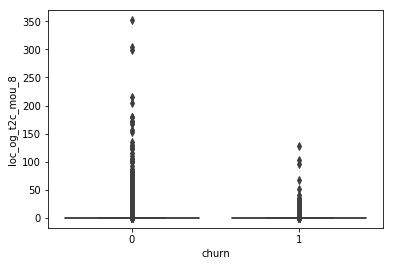

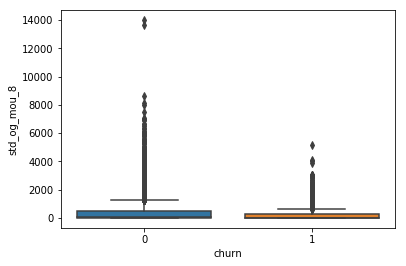

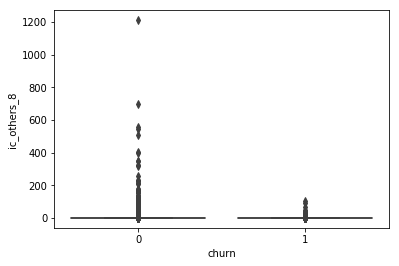

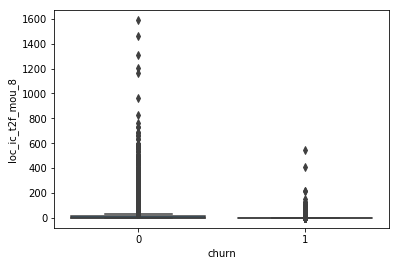

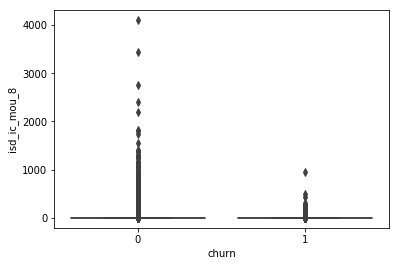

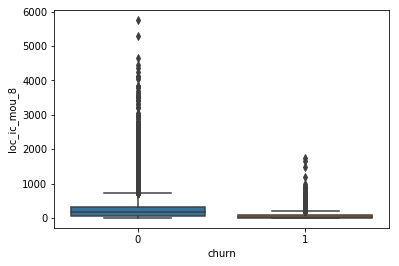

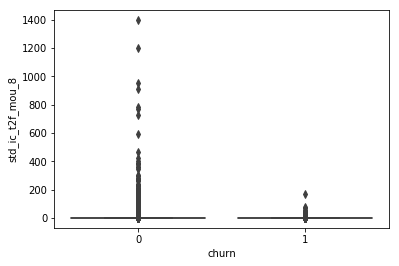

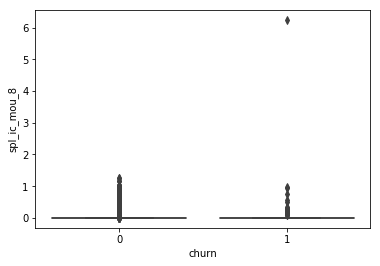

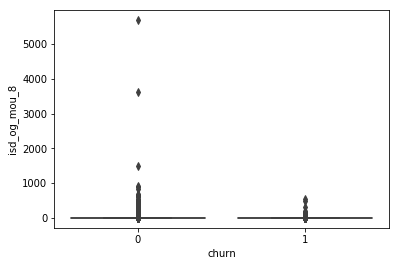

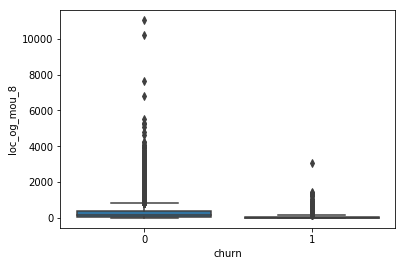

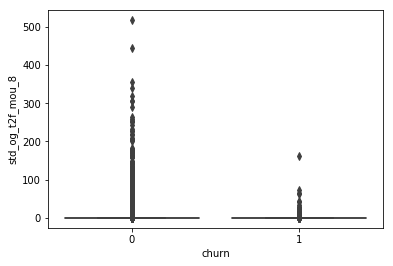

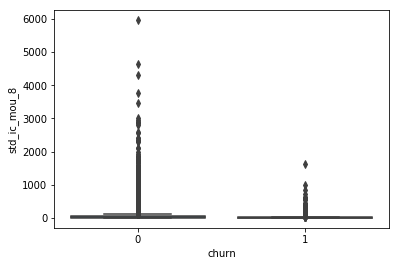

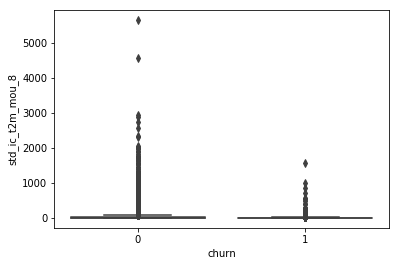

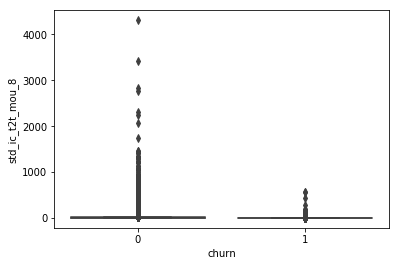

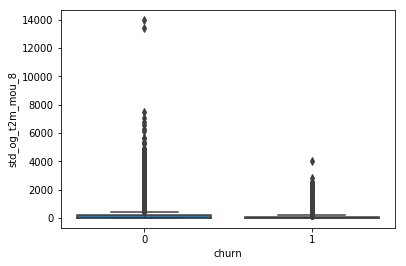

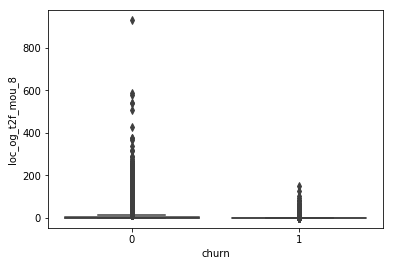

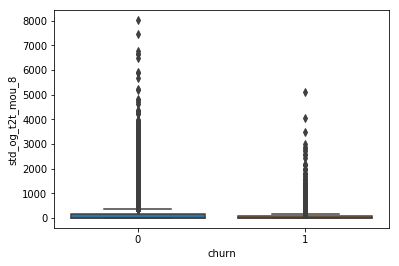

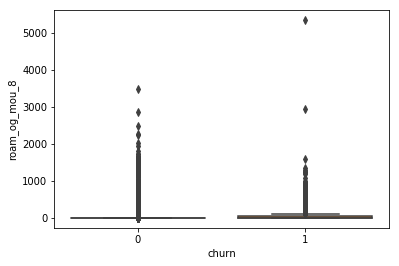

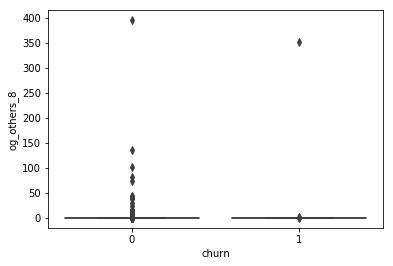

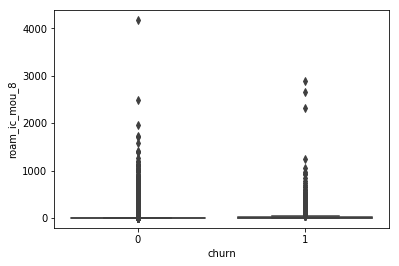

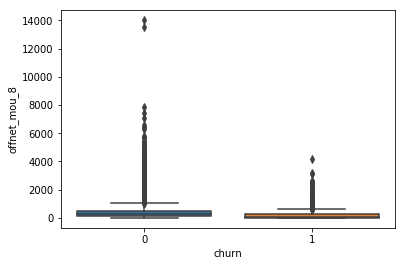

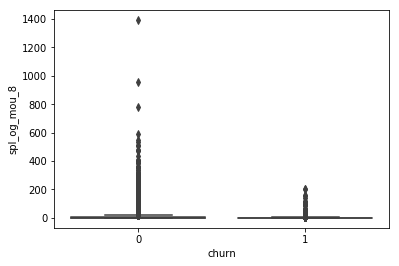

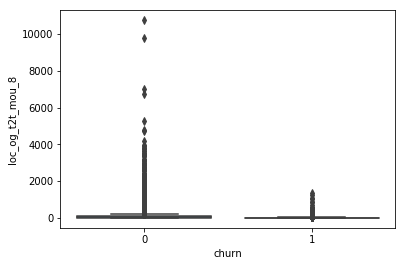

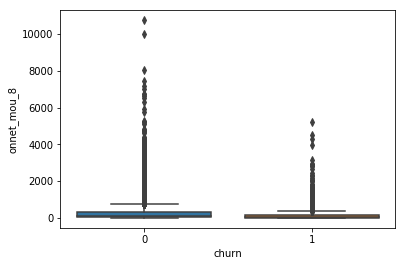

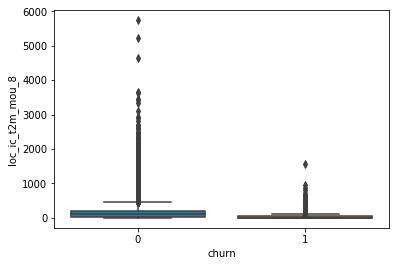

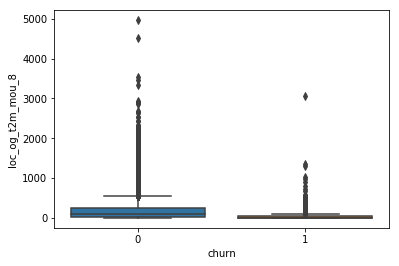

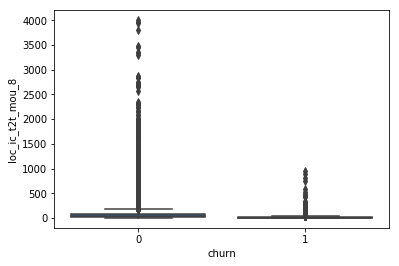

TypeError: ufunc add cannot use operands with types dtype('<M8[ns]') and dtype('<M8[ns]')

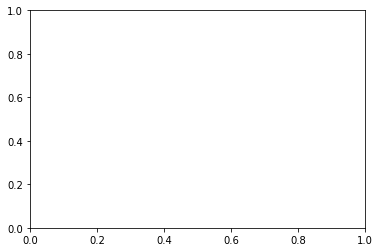

In [114]:
for _column in filtered_columns:
    plt.figure()
    sns.boxplot(y=_column, x='churn', data=filtered_data, orient='v')
    plt.show()

In [115]:
filtered_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Data columns (total 131 columns):
loc_og_t2c_mou_8       float64
std_og_mou_8           float64
ic_others_8            float64
loc_ic_t2f_mou_8       float64
isd_ic_mou_8           float64
loc_ic_mou_8           float64
std_ic_t2f_mou_8       float64
spl_ic_mou_8           float64
isd_og_mou_8           float64
loc_og_mou_8           float64
std_og_t2f_mou_8       float64
std_ic_mou_8           float64
std_ic_t2m_mou_8       float64
std_ic_t2t_mou_8       float64
std_og_t2m_mou_8       float64
loc_og_t2f_mou_8       float64
std_og_t2t_mou_8       float64
roam_og_mou_8          float64
og_others_8            float64
roam_ic_mou_8          float64
offnet_mou_8           float64
spl_og_mou_8           float64
loc_og_t2t_mou_8       float64
onnet_mou_8            float64
loc_ic_t2m_mou_8       float64
loc_og_t2m_mou_8       float64
loc_ic_t2t_mou_8       float64
date_of_last_rech_8    datetime64[ns]
std_ic_t2f_mou_

#### Feature engineering: 

In [116]:
filtered_data.date_of_last_rech_7.dtype

dtype('<M8[ns]')

In [117]:
def filter_date_and_day(_data):
    for _column in _data.select_dtypes(include=['datetime64']).columns:
        _data[_column + '_year'] = _data[_column].dt.year 
        _data[_column + '_month'] = _data[_column].dt.month 
        _data[_column + '_day'] = _data[_column].dt.day
        _data.drop(columns=[_column], axis=1, inplace=True)
    return _data

filtered_data = filter_date_and_day(filtered_data)
filtered_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Data columns (total 137 columns):
loc_og_t2c_mou_8             float64
std_og_mou_8                 float64
ic_others_8                  float64
loc_ic_t2f_mou_8             float64
isd_ic_mou_8                 float64
loc_ic_mou_8                 float64
std_ic_t2f_mou_8             float64
spl_ic_mou_8                 float64
isd_og_mou_8                 float64
loc_og_mou_8                 float64
std_og_t2f_mou_8             float64
std_ic_mou_8                 float64
std_ic_t2m_mou_8             float64
std_ic_t2t_mou_8             float64
std_og_t2m_mou_8             float64
loc_og_t2f_mou_8             float64
std_og_t2t_mou_8             float64
roam_og_mou_8                float64
og_others_8                  float64
roam_ic_mou_8                float64
offnet_mou_8                 float64
spl_og_mou_8                 float64
loc_og_t2t_mou_8             float64
onnet_mou_8                  float64
lo

In [118]:
filtered_data.select_dtypes(include=['datetime64']).columns

Index([], dtype='object')

In [119]:
# remove rows whose rows has null values more than 80
filtered_data = filtered_data[~(filtered_data.apply(lambda x: sum(x.isnull().values), axis = 1)> 80)]

In [120]:
filtered_data.shape

(29857, 137)

#### Standardise the data: 

In [121]:
filtered_data.dropna(inplace=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [122]:
filtered_data.shape

(28455, 137)

In [124]:
qar = filtered_data['loc_og_t2m_mou_6'].quantile(1.0)
filtered_data[ filtered_data['onnet_mou_8'] < qar].shape

(28433, 137)

In [144]:
filtered_data.shape

(28455, 137)

In [200]:
# filtered_data = dup

In [138]:
dup = filtered_data

In [201]:
Q1 = filtered_data.quantile(0.05)
Q3 = filtered_data.quantile(0.99)
IQR = Q3 - Q1

filtered_data = filtered_data[~((filtered_data < (Q1 - 1.5 * IQR)) |(filtered_data > (Q3 + 1.5 * IQR))).any(axis=1)]
filtered_data.shape

(26097, 137)

In [202]:
X = filtered_data.drop(columns=['churn'], axis=1)
Y = filtered_data[['churn']]

scaler = StandardScaler()
_columns = X.columns
X[_columns] = scaler.fit_transform(X)
X.head()


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,loc_og_t2c_mou_8,std_og_mou_8,ic_others_8,loc_ic_t2f_mou_8,isd_ic_mou_8,loc_ic_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_og_mou_8,loc_og_mou_8,...,mobile_number,date_of_last_rech_8_year,date_of_last_rech_8_month,date_of_last_rech_8_day,date_of_last_rech_7_year,date_of_last_rech_7_month,date_of_last_rech_7_day,date_of_last_rech_6_year,date_of_last_rech_6_month,date_of_last_rech_6_day
7,-0.302985,-0.492982,4.494472,0.766521,0.710030,-0.161341,2.732913,-0.254652,3.052052,-0.013704,...,-0.773197,0.0,0.0,-0.202467,0.0,0.0,-0.669380,0.0,0.0,0.013838
8,1.121965,-0.457462,-0.224994,-0.409092,-0.213957,-0.822051,-0.250384,-0.254652,-0.107967,-0.624203,...,0.435029,0.0,0.0,0.601486,0.0,0.0,0.807731,0.0,0.0,-0.479508
16,-0.302985,-0.590834,-0.224994,0.563696,-0.207229,-0.070280,0.042439,-0.254652,-0.107967,-0.171626,...,-0.517881,0.0,0.0,-2.614327,0.0,0.0,0.807731,0.0,0.0,0.753857
17,-0.302985,-0.628248,-0.224994,-0.409092,-0.213957,-0.882618,-0.250384,-0.254652,-0.107967,-0.823871,...,-1.527790,0.0,0.0,-0.403455,0.0,0.0,0.561546,0.0,0.0,0.753857
21,-0.302985,1.003128,-0.224994,-0.100096,-0.213957,-0.272309,-0.250384,-0.254652,-0.107967,-0.412944,...,1.314686,0.0,0.0,0.802474,0.0,0.0,0.807731,0.0,0.0,0.753857


In [203]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

In [204]:
x_train.head()

,loc_og_t2c_mou_8,std_og_mou_8,ic_others_8,loc_ic_t2f_mou_8,isd_ic_mou_8,loc_ic_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_og_mou_8,loc_og_mou_8,...,mobile_number,date_of_last_rech_8_year,date_of_last_rech_8_month,date_of_last_rech_8_day,date_of_last_rech_7_year,date_of_last_rech_7_month,date_of_last_rech_7_day,date_of_last_rech_6_year,date_of_last_rech_6_month,date_of_last_rech_6_day
47738,-0.302985,-0.144877,-0.147064,-0.409092,-0.213957,-0.744952,-0.250384,-0.254652,-0.107967,-0.717734,...,-1.549586,0.0,0.0,-0.202467,0.0,0.0,0.069176,0.0,0.0,0.507184
94170,-0.302985,-0.627848,-0.224994,0.082506,-0.213957,0.329599,0.230490,-0.254652,-0.107967,3.596554,...,-0.515156,0.0,0.0,0.400498,0.0,0.0,-1.161751,0.0,0.0,-1.712872
66819,-0.107677,-0.628248,-0.224994,-0.379649,-0.213957,0.068690,-0.250384,-0.254652,-0.107967,-0.405659,...,-0.098337,0.0,0.0,-0.604444,0.0,0.0,0.807731,0.0,0.0,0.260511
33455,-0.302985,-0.246500,-0.224994,0.458714,-0.213957,-0.076225,0.728825,-0.254652,-0.107967,0.026837,...,-1.581489,0.0,0.0,0.802474,0.0,0.0,0.561546,0.0,0.0,0.013838
63323,-0.281062,-0.114780,-0.224994,-0.224705,-0.213957,-0.195095,-0.250384,3.606401,-0.107967,-0.537197,...,1.238369,0.0,0.0,0.400498,0.0,0.0,0.807731,0.0,0.0,0.507184


In [205]:
x_train.shape

(18267, 136)

In [206]:
pca = PCA(random_state=100, svd_solver='randomized')
pca.fit_transform(x_train)

array([[-4.24842706e+00, -5.60009063e-01, -7.80775912e-01, ...,
        -5.13167683e-16, -1.84329826e-17, -8.19248394e-16],
       [ 2.46716687e+00, -1.13414443e+00, -1.32791226e+00, ...,
         1.44572692e-16, -3.13353898e-16,  5.61916521e-16],
       [-1.48552083e+00, -2.11771960e+00, -2.54012651e+00, ...,
         1.09474175e-16, -3.10949219e-16,  3.31113157e-16],
       ...,
       [-1.86609872e+00, -1.80269174e+00, -1.01621206e+00, ...,
         7.07146657e-18, -1.00764653e-17,  5.22352220e-18],
       [ 6.04598646e-01, -2.63564056e+00,  2.10162401e+00, ...,
        -1.11629414e-17,  2.58807163e-17, -4.66507770e-17],
       [ 3.12949116e+00,  1.47162267e+00, -5.91457445e-01, ...,
         3.54173935e-17, -2.50989320e-17,  2.71200668e-17]])

In [207]:
pca.components_.round(4)

array([[ 5.000e-04, -4.970e-02,  2.580e-02, ...,  0.000e+00,  0.000e+00,
        -1.750e-02],
       [ 2.960e-02,  2.321e-01,  5.300e-03, ..., -0.000e+00, -0.000e+00,
         8.030e-02],
       [ 4.000e-04,  3.310e-02, -4.000e-04, ...,  0.000e+00,  0.000e+00,
        -7.490e-02],
       ...,
       [ 0.000e+00, -0.000e+00, -0.000e+00, ...,  0.000e+00,  0.000e+00,
        -0.000e+00],
       [-0.000e+00, -0.000e+00, -0.000e+00, ..., -0.000e+00, -1.000e+00,
        -0.000e+00],
       [ 0.000e+00,  0.000e+00,  0.000e+00, ...,  1.000e+00,  0.000e+00,
         0.000e+00]])

In [208]:
colnames = list(x_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head(10)

,PC1,PC2,Feature
0,0.000452,0.029634,loc_og_t2c_mou_8
1,-0.049702,0.232056,std_og_mou_8
2,0.025813,0.005330,ic_others_8
3,0.109667,-0.041002,loc_ic_t2f_mou_8
4,0.028593,-0.002413,isd_ic_mou_8
5,0.211306,-0.027479,loc_ic_mou_8
6,0.058722,-0.024064,std_ic_t2f_mou_8
7,-0.022115,0.023452,spl_ic_mou_8
8,0.015250,-0.008625,isd_og_mou_8
9,0.195059,0.020840,loc_og_mou_8


In [209]:
pca.explained_variance_ratio_.round(4)

array([0.111 , 0.0939, 0.0561, 0.0449, 0.0379, 0.0375, 0.028 , 0.0264,
       0.0248, 0.0238, 0.0222, 0.021 , 0.0193, 0.0187, 0.0173, 0.0163,
       0.0143, 0.0135, 0.0129, 0.0124, 0.0116, 0.0113, 0.0107, 0.0101,
       0.0098, 0.0095, 0.0091, 0.0086, 0.0084, 0.0082, 0.0076, 0.0075,
       0.0073, 0.0073, 0.007 , 0.0069, 0.0068, 0.0065, 0.0064, 0.0062,
       0.0061, 0.0059, 0.0058, 0.0056, 0.0055, 0.0054, 0.0053, 0.0051,
       0.0049, 0.0048, 0.0047, 0.0046, 0.0044, 0.0042, 0.0041, 0.004 ,
       0.004 , 0.0039, 0.0038, 0.0035, 0.0034, 0.0034, 0.0033, 0.0033,
       0.0032, 0.0032, 0.0031, 0.003 , 0.0029, 0.0029, 0.0028, 0.0027,
       0.0026, 0.0026, 0.0025, 0.0024, 0.0024, 0.0022, 0.0021, 0.0021,
       0.002 , 0.002 , 0.002 , 0.0019, 0.0019, 0.0018, 0.0017, 0.0017,
       0.0016, 0.0016, 0.0015, 0.0013, 0.0013, 0.0013, 0.001 , 0.0009,
       0.0008, 0.0008, 0.0007, 0.0006, 0.0004, 0.0004, 0.0002, 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
      

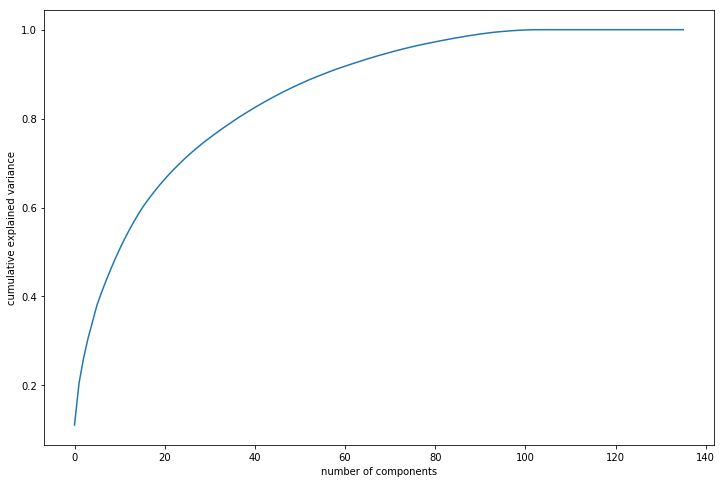

In [210]:
fig = plt.figure(figsize=(12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

##### we try to make 85 components to describe 95% of the components

In [211]:
pca_final = IncrementalPCA(n_components=85)
df_train_pca = pca_final.fit_transform(x_train)
df_train_pca.shape

(18267, 85)

#### Check correlation: 

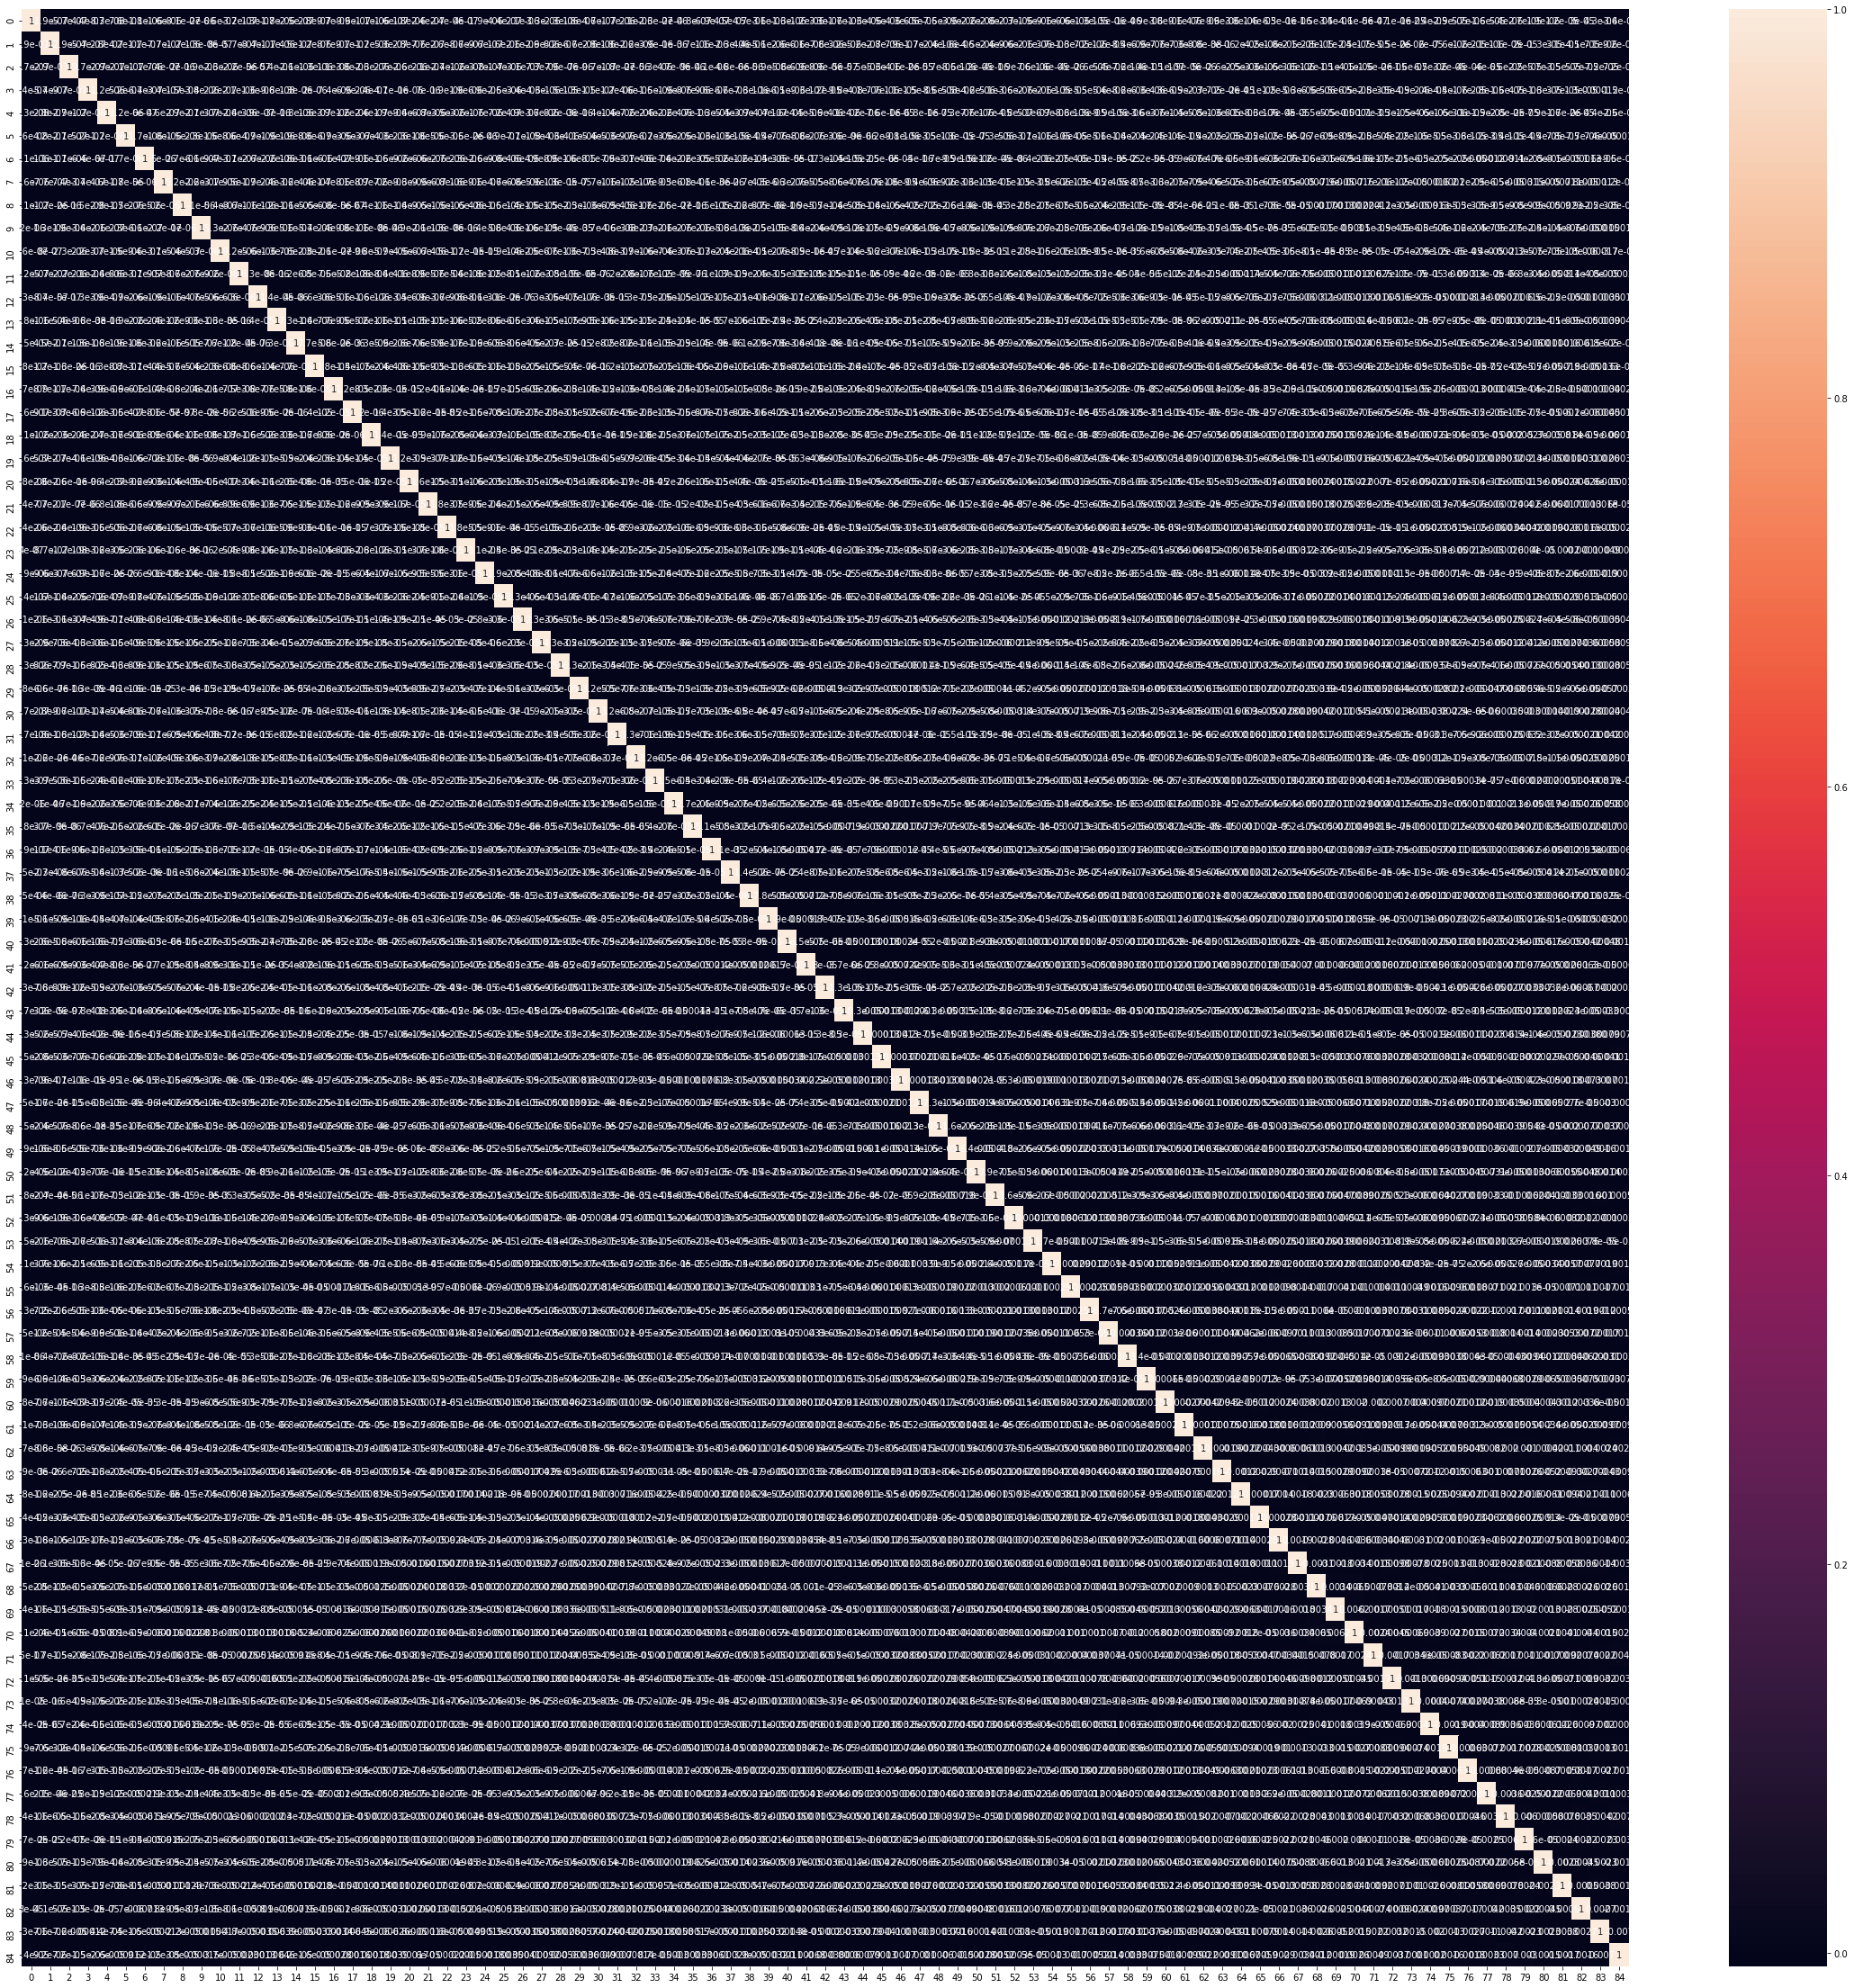

In [212]:
corrmat = np.corrcoef(df_train_pca.transpose())
plt.figure(figsize=(40, 40))
sns.heatmap(corrmat, annot=True)

#### There is no co-relation b/w the variables:

#### Transform the test data:

In [213]:
pca_test_data = pca_final.transform(x_test)


In [214]:
pca_test_data.shape

(7830, 85)

## Logistic regression:

In [215]:
logistic_regression = LogisticRegression()
logistic_model = logistic_regression.fit(df_train_pca, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [216]:
predicted_proba = logistic_model.predict_proba(pca_test_data)[:, 1]

In [217]:
"{:2.2}".format(metrics.roc_auc_score(y_test, predicted_proba))

'0.89'

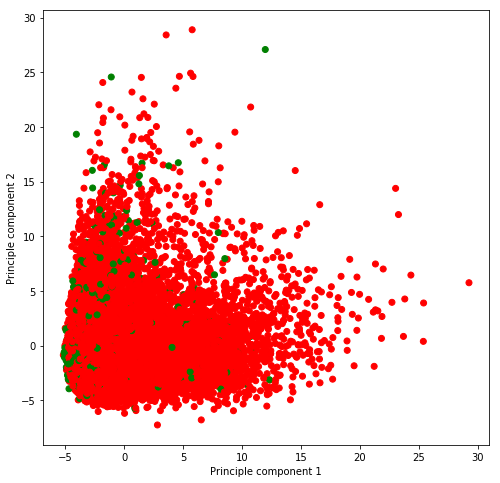

In [218]:
plt.figure(figsize=(8, 8))
plt.scatter(df_train_pca[:, 0], df_train_pca[:, 1], c= y_train['churn'].map({0: 'red', 1: 'green'}))
plt.xlabel('Principle component 1')
plt.ylabel('Principle component 2')

plt.show()

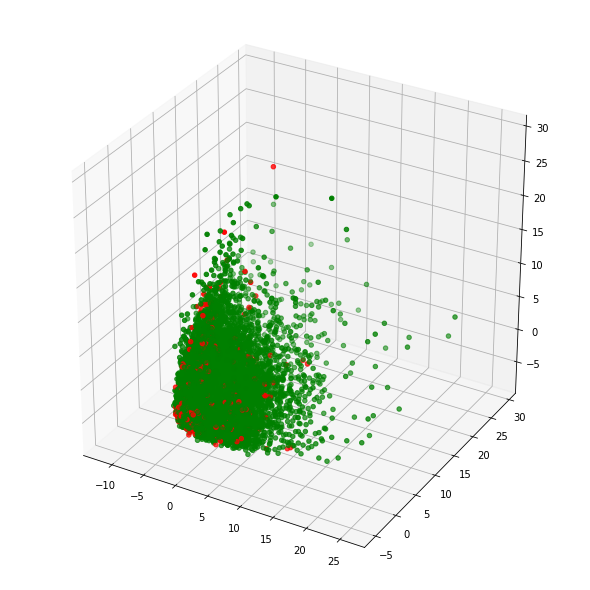

In [219]:
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
# ax = plt.axes(projection='3d')
ax.scatter(df_train_pca[:,2], df_train_pca[:,0], df_train_pca[:,1], c=y_train['churn'].map({0:'green',1:'red'}))

In [220]:
len(logistic_model.coef_[0])

85

In [221]:
len(colnames)

136

In [222]:
pca_column_frame = pcs_df.head(85)
pca_column_frame.head()

,PC1,PC2,Feature
0,0.000452,0.029634,loc_og_t2c_mou_8
1,-0.049702,0.232056,std_og_mou_8
2,0.025813,0.005330,ic_others_8
3,0.109667,-0.041002,loc_ic_t2f_mou_8
4,0.028593,-0.002413,isd_ic_mou_8


In [225]:
# result =  pd.DataFrame({'columns': colnames})
pca_column_frame['coeff'] = logistic_model.coef_[0]
pca_column_frame.sort_values(by=['coeff'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,PC1,PC2,Feature,coefff,coeff
31,-0.006599,4.359020e-02,og_others_6,-0.935928,-0.935928
30,0.041809,3.816962e-02,std_ic_t2m_mou_6,-0.491061,-0.491061
52,0.046642,4.661138e-02,std_ic_mou_6,-0.455709,-0.455709
0,0.000452,2.963383e-02,loc_og_t2c_mou_8,-0.425516,-0.425516
39,0.015592,-1.060532e-02,isd_og_mou_6,-0.253605,-0.253605
65,0.117442,2.653334e-02,loc_og_t2t_mou_7,-0.249955,-0.249955
28,0.182198,-3.499226e-02,loc_ic_t2m_mou_6,-0.249679,-0.249679
26,0.138405,-8.878540e-03,loc_ic_t2t_mou_8,-0.221957,-0.221957
59,0.000063,3.600339e-03,roam_ic_mou_7,-0.211950,-0.211950
77,0.107502,-3.768407e-02,loc_og_t2f_mou_7,-0.200183,-0.200183


## Random forest classifier:

In [236]:
rfc = RandomForestClassifier(n_jobs=-1, bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=8,
                             n_estimators=60)
rfc.fit(df_train_pca,y_train)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features=8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [237]:
predictions = rfc.predict(pca_test_data)

In [238]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7345
           1       0.00      0.00      0.00       485

   micro avg       0.94      0.94      0.94      7830
   macro avg       0.47      0.50      0.48      7830
weighted avg       0.88      0.94      0.91      7830



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [241]:
accuracy_score(y_true=y_test, y_pred=predictions).round(2)

0.94

In [245]:
print(confusion_matrix(y_test, predictions))

[[7345    0]
 [ 485    0]]


In [254]:
predictions[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [278]:
y_test.head(10)

,churn
34755,0
90678,0
41116,0
21025,0
65856,0
65507,0
66589,0
24778,0
32417,1
17499,0


In [258]:
predicted_proba[:10].round(3)

array([0.075, 0.015, 0.003, 0.039, 0.202, 0.001, 0.007, 0.005, 0.392,
       0.004])

In [279]:
y_test.head(10)

,churn
34755,0
90678,0
41116,0
21025,0
65856,0
65507,0
66589,0
24778,0
32417,1
17499,0


In [263]:
print(confusion_matrix(y_test, predictions))

[[7345    0]
 [ 485    0]]


In [259]:
metrics.roc_auc_score(y_test, predicted_proba)

0.8933407255093232

### Sampling :

In [266]:
import imblearn

In [268]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(return_indices=True)
x_rus, y_run, ind = rus.fit_sample(x_train, y_train)

In [269]:
x_rus.shape

(2232, 136)

In [271]:
y_run.sum()

1116

Note: There may be a chance of loosing the data with under sampling

#### Over sampling: 

In [343]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(return_indices=True)

# x_ros, y_ros, ind = ros.fit_sample(x_train, y_train)
# x_test_ros, y_test_ros, ind = ros.fit_sample(x_test, y_test)

x_ros, y_ros, ind = ros.fit_sample(df_train_pca, y_train)
x_test_ros, y_test_ros, ind = ros.fit_sample(pca_test_data, y_test)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [344]:
x_ros.shape

(34302, 85)

In [345]:
y_ros.sum()

17151

In [373]:
def fit_random_forest(x_train_data, x_test_data, y_train_data, y_test_data):
    rf = RandomForestClassifier(n_jobs=-1,
                                bootstrap=True,
                                max_depth=4,
                                min_samples_leaf=50,
                                min_samples_split=50,
                                n_estimators=60)
    rf.fit(x_train_data, y_train_data)
    predictions = rf.predict(x_test_data)
    print(classification_report(y_test_data, predictions))
    print(accuracy_score(y_true=y_test_data, y_pred=predictions))
    print(confusion_matrix(y_test_data, predictions))
    return rf

In [374]:
rfe_algo = fit_random_forest(x_ros, x_test_ros, y_ros, y_test_ros)

              precision    recall  f1-score   support

           0       0.76      0.84      0.80      7345
           1       0.82      0.73      0.78      7345

   micro avg       0.79      0.79      0.79     14690
   macro avg       0.79      0.79      0.79     14690
weighted avg       0.79      0.79      0.79     14690

0.7876106194690266
[[6190 1155]
 [1965 5380]]


#### Oversampling followed by under sampling:

In [360]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(ratio='auto')
x_smt_train, y_smt_train = smt.fit_sample(df_train_pca, y_train)
x_smt_test, y_smt_test = smt.fit_sample(pca_test_data, y_test)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [375]:
rfe_algo = fit_random_forest(x_smt_train, x_smt_test, y_smt_train, y_smt_test)

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      7344
           1       0.84      0.81      0.82      7344

   micro avg       0.83      0.83      0.83     14688
   macro avg       0.83      0.83      0.83     14688
weighted avg       0.83      0.83      0.83     14688

0.8250953159041394
[[6172 1172]
 [1397 5947]]


In [377]:
rfe_algo.feature_importances_.round(3)

array([0.149, 0.015, 0.016, 0.023, 0.014, 0.002, 0.177, 0.053, 0.01 ,
       0.008, 0.012, 0.027, 0.026, 0.002, 0.042, 0.01 , 0.   , 0.13 ,
       0.014, 0.034, 0.   , 0.002, 0.008, 0.026, 0.015, 0.001, 0.017,
       0.004, 0.001, 0.001, 0.003, 0.002, 0.003, 0.   , 0.   , 0.002,
       0.002, 0.001, 0.005, 0.004, 0.001, 0.   , 0.003, 0.   , 0.003,
       0.   , 0.   , 0.002, 0.001, 0.   , 0.   , 0.001, 0.031, 0.033,
       0.001, 0.001, 0.002, 0.   , 0.002, 0.   , 0.001, 0.023, 0.001,
       0.004, 0.004, 0.004, 0.   , 0.   , 0.003, 0.002, 0.001, 0.   ,
       0.   , 0.   , 0.001, 0.001, 0.   , 0.007, 0.003, 0.002, 0.003,
       0.   , 0.001, 0.   , 0.   ])

#### Over sampling with under sampling with logistic regression: 

In [363]:
def fit_logistic_regression(x_train_data, x_test_data, y_train_data, y_test_data):
    log = LogisticRegression(random_state=True)
    log.fit(x_train_data, y_train_data)
    predicted_proba = log.predict_proba(x_test_data)[:,1]
    print(metrics.roc_auc_score(y_test_data, predicted_proba))
    return log

In [364]:
log_alg = fit_logistic_regression(x_smt_train, x_smt_test, y_smt_train, y_smt_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9149393069379774


In [365]:
_percentage = log_alg.predict_proba(x_smt_test)[:,1]

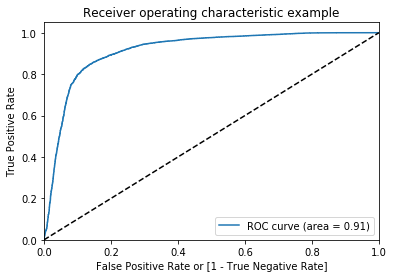

In [366]:
def draw_roc(actual, probability):
    fpr, tpr, thershoulds = metrics.roc_curve(actual, probability, drop_intermediate=False)
    auc = metrics.roc_auc_score(actual, probability)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

draw_roc(y_smt_test, _percentage)


In [367]:
log_alg.coef_.round(2)

array([[-0.47,  0.05, -0.2 ,  0.06, -0.26,  0.08,  0.58, -0.2 , -0.08,
        -0.08, -0.01,  0.11,  0.22, -0.02,  0.02,  0.1 ,  0.05,  0.71,
        -0.14,  0.02, -0.07, -0.11,  0.03,  0.19, -0.17, -0.05, -0.24,
         0.07, -0.3 ,  0.05, -0.57, -1.08, -0.1 ,  0.02, -0.04,  0.12,
        -0.12,  0.19, -0.07, -0.39, -0.08,  0.15,  0.43,  0.22, -0.02,
        -0.12,  0.08, -0.23, -0.22, -0.11,  0.16,  0.02, -0.69, -0.22,
         0.09, -0.09, -0.25,  0.12, -0.09, -0.11,  0.03,  0.02,  0.02,
        -0.16,  0.1 , -0.31,  0.09, -0.17,  0.01,  0.  , -0.16,  0.03,
         0.01, -0.02,  0.15,  0.03, -0.04, -0.34,  0.46,  0.22, -0.08,
        -0.19,  0.48, -0.18, -0.25]])

In [368]:
pca_column_frame.shape

(85, 5)

In [369]:
log_alg.coef_[0].shape

(85,)

In [380]:
pca_column_frame['sampling_coeff'] = log_alg.coef_[0]
pca_column_frame.iloc[(-np.abs(pca_column_frame['sampling_coeff'].values)).argsort()].Feature
# pca_column_frame.sort_values(by=['sampling_coeff'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


31            og_others_6
17          roam_og_mou_8
52           std_ic_mou_6
6        std_ic_t2f_mou_8
30       std_ic_t2m_mou_6
82                 arpu_7
0        loc_og_t2c_mou_8
78       loc_ic_t2m_mou_7
42       loc_og_t2m_mou_6
39           isd_og_mou_6
77       loc_og_t2f_mou_7
65       loc_og_t2t_mou_7
28       loc_ic_t2m_mou_6
4            isd_ic_mou_8
56           spl_og_mou_7
84    good_phase_recharge
26       loc_ic_t2t_mou_8
47            ic_others_6
48           isd_ic_mou_6
79       loc_og_t2m_mou_7
53       std_og_t2t_mou_6
12       std_ic_t2m_mou_8
43       loc_og_t2t_mou_6
2             ic_others_8
7            spl_ic_mou_8
37           std_og_mou_6
81                 arpu_6
23            onnet_mou_8
83                 arpu_8
24       loc_ic_t2m_mou_8
             ...         
80       loc_ic_t2t_mou_7
8            isd_og_mou_8
40       loc_og_t2c_mou_6
38           loc_ic_mou_6
20           offnet_mou_8
27       std_ic_t2f_mou_6
3        loc_ic_t2f_mou_8
16       std

In [385]:
log_alg.classes_

array([0, 1], dtype=int64)

In [383]:
# x_smt_train, x_smt_test, y_smt_train, y_smt_test

model_rf = RandomForestClassifier(bootstrap=True,
                                  max_depth=10,
                                  min_samples_leaf=100, 
                                  min_samples_split=200,
                                  n_estimators=1000,
                                  oob_score = True, n_jobs = -1,
                                  random_state =50,
                                  max_features = 15,
                                  max_leaf_nodes = 30)
model_rf.fit(x_smt_train, y_smt_train)

# Make predictions
prediction_test = model_rf.predict(x_smt_test)

print(classification_report(y_smt_test,prediction_test))
print(confusion_matrix(y_smt_test,prediction_test))


              precision    recall  f1-score   support

           0       0.82      0.87      0.84      7344
           1       0.86      0.80      0.83      7344

   micro avg       0.83      0.83      0.83     14688
   macro avg       0.84      0.83      0.83     14688
weighted avg       0.84      0.83      0.83     14688

[[6360  984]
 [1440 5904]]


In [387]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [ ]:
r_model = RandomForestClassifier()
params = {
    'max_features': range(4, 60),
    'n_estimators': range(20, 80, 20),
    'min_samples_leaf': range(100, 600, 200),
    'min_samples_split': range(50, 150, 25),
    'max_depth': [3, 4, 5, 7, 8, 9, 10]
}

folds = KFold(n_splits=5, shuffle=True, random_state=101)
grid_cv1 = GridSearchCV(r_model,
                        param_grid=params,
                        scoring='accuracy',
                        n_jobs=-1,
                        cv=folds,
                        verbose=1,
                        return_train_score=True)
grid_cv1.fit(x_train, y_train)

Fitting 5 folds for each of 14112 candidates, totalling 70560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 14.9min
